In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import os

print "OpenCV Version : %s " % cv2.__version__




OpenCV Version : 3.3.0 


In [2]:
def showImGray(image):
    
    plt.imshow(image, cmap='gray')
    plt.show()

def showImBGR(image,cutBox=False):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if (cutBox!=False):
        x1,y1,x2,y2 = cutBox
        image=image[y1:y2,x1:x2]
    plt.imshow(image)
    plt.show()

    
def load_images_from_folder(folder):
    images = []
    k=0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            k+=1
            #images.append(img)
    return k


In [ ]:

PATH = "test/painted_mask1.png"
PATH2= "test/gray_mask2.png"
img = cv2.imread(PATH,0)

showImGray(img)


In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([hsv],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
showImGray( cv2.morphologyEx(color_masks[0], cv2.MORPH_CLOSE, kernel) )    
showImGray(color_masks[0]+gray_masks[0])
showImGray(get_conected(color_masks[0],gray_masks[0]))



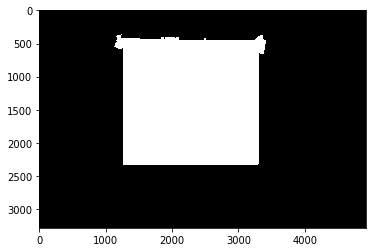

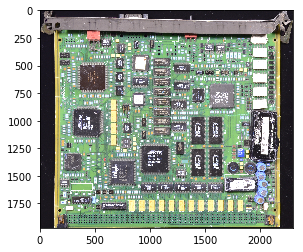

In [61]:
import orientation as orient
imcolor=cv2.imread("cvl_pcb_dslr_1/pcb3/rec3.jpg")
immask=cv2.imread("cvl_pcb_dslr_1/pcb3/rec3-mask.png",0)
imcolor,immask=orient.straighten(imcolor, immask)
#contours,hierarchy = cv2.findContours(immask, 1, 2)


x,y,w,h = cv2.boundingRect(immask)
imcolor=imcolor[y:y+h,x:x+w]
showImGray(immask)
showImBGR(imcolor)


In [63]:
import background_segmentation as bs
bs.imptest()
back=bs.back_mask(imcolor)


lasorra
Realizando clustering con colores separados
Color Codegook [[124  59 132]
 [ 58  79 165]] Gray Codebook [[  0   0 147]
 [  0   0  39]
 [  0   0 242]]
propuesta soldermask  1  propuesta serigrafia  1
con valores de  [200943, 1823256] [966045, 1095542, 433717]


NameError: name 'ShowImGray' is not defined

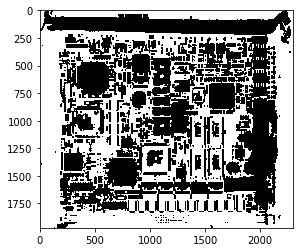

In [64]:
showImGray(back)

In [67]:
def load_images_from_folder(folder):
    images = []
    k=0
    for filename in os.listdir(folder):
        sts=os.path.join(folder,filename)
        img = cv2.imread(sts)
        print sts
        if img is not None:
            k+=1
            #images.append(img)
        else:
            load_images_from_folder(sts)
    return k

folder="/Users/Jpcoseco/PycharmProjects/OPGE/cvl_pcb_dslr_1"
print load_images_from_folder(folder)

/Users/Jpcoseco/PycharmProjects/OPGE/cvl_pcb_dslr_1/.DS_Store


OSError: [Errno 20] Not a directory: '/Users/Jpcoseco/PycharmProjects/OPGE/cvl_pcb_dslr_1/.DS_Store'